## 2014년 이후 연도 별로 독립영화 영화수와 매출액(전국관객수) 관계
귀무가설 : 2014년 이후 매해 개봉하는 독립영화 수와 매출액은 관계가 없다-.<br>
분산이 다른 걸 보여주기 -> 귀무가설 기각 -> 2014년 이후 매해 개봉하는 독립영화 수와 매출액은 관계가 있다.<br>

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rc

df = pd.read_csv("https://raw.githubusercontent.com/yujin-jo/mini-project-team1/main/1.%20Crawling/data/KOBIS_TOT.csv")

In [63]:
#print(plt.rcParams['font.family'])
plt.rc("font", family= "Malgun Gothic")

['AppleGothic']


In [33]:
df1 = df[(df.개봉연도 >= 2014)]
df1

,순번,개봉연도,영화명,감독,배급사,개봉일,국적,전국스크린수,전국매출액,전국관객수,장르,등급,영화구분
731,732,2014,명량,김한민,(주)씨제이이엔엠,2014-07-30,한국,1587,135748398910,17613682,사극,15세이상관람가,일반영화
732,733,2014,겨울왕국,"크리스 벅,제니퍼 리",소니픽쳐스릴리징월트디즈니스튜디오스코리아(주),2014-01-16,미국,1010,82461504400,10296101,애니메이션,전체관람가,일반영화
733,734,2014,인터스텔라,크리스토퍼 놀란,워너브러더스 코리아(주),2014-11-06,미국,1342,80654690300,10103568,SF,12세이상관람가,일반영화
734,735,2014,해적: 바다로 간 산적,이석훈,롯데쇼핑㈜롯데엔터테인먼트,2014-08-06,한국,838,66240631706,8646758,어드벤처,12세이상관람가,일반영화
735,736,2014,수상한 그녀,황동혁,(주)씨제이이엔엠,2014-01-22,한국,692,62696639249,8656397,드라마,15세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3370,3371,2020,기도의 막이 내릴 때,후쿠자와 카츠오,노바엔터테인먼트,2020-05-14,일본,33,4874540,601,드라마,15세이상관람가,독립/예술영화
3371,3372,2020,메피스토,김동후,(주)영화사 그램,2020-09-10,한국,30,4054900,502,드라마,15세이상관람가,독립/예술영화
3372,3373,2020,더 워닝,다니엘 칼파소로,(주)더블앤조이픽쳐스,2020-05-06,스페인,32,2068500,448,스릴러,15세이상관람가,독립/예술영화
3373,3374,2020,퀸 오브 아이스,안네 세비스퀴,(주)엣나인필름,2020-03-26,노르웨이,36,3109840,419,드라마,15세이상관람가,독립/예술영화


In [39]:
t = df1[(df1.영화구분 == '독립/예술영화') & (df1.개봉연도 > 2014)].groupby(['개봉연도', '영화구분'])['순번'].count().reset_index()

tmp = df1[(df1.영화구분 == '독립/예술영화') & (df1.개봉연도 > 2014)].groupby(['개봉연도', '영화구분'])['전국관객수'].sum().reset_index()
tmp
t['전국관객수'] = tmp.전국관객수
t

,개봉연도,영화구분,순번,전국관객수
0,2015,독립/예술영화,162,7188493
1,2016,독립/예술영화,193,7800341
2,2017,독립/예술영화,236,8502997
3,2018,독립/예술영화,216,7611377
4,2019,독립/예술영화,200,6933326
5,2020,독립/예술영화,206,3084087


In [40]:
from statsmodels.formula.api import ols

m = ols("전국관객수 ~ 순번", data = t).fit().summary()
m

D:\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국관객수   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.231
Method:                 Least Squares   F-statistic:                   0.06268
Date:                Sun, 29 Aug 2021   Prob (F-statistic):              0.815
Time:                        17:18:57   Log-Likelihood:                -94.741
No. Observations:                   6   AIC:                             193.5
Df Residuals:                       4   BIC:                             193.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.898e+06   7.86e+06      0.623      0.567   -1.69e+07    2.67e+07
순번          9674.5033   3.86e+04      0.250      0.815   -9.76e+04    1.17e+05
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   0.889
Prob(Omnibus):                    nan   Jarque-Bera (JB):                2.776
Skew:                          -1.608   Prob(JB):                        0.250
Kurtosis:                       3.872   Cond. No.                     1.83e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 결론
귀무가설 : 2014년 이후 개봉하는 독립영화 수와 매출액(관객수)은 관계가 없다. <br>
p-value 0.05보다 크므로 귀무가설 채택.

## 의문

영화 수, 매출액, 관객 수는 관계가 없다. 왜? <br>
-> 사람들은 모든 영화를 고르게 보지 않고 특정 영화만 보았다. 
-> 독립 영화 내의 불균형이 있다는 것을 의미한다...?!<br>

독립영화 시장은 ‘공급’에 비해 ‘수요’가 매우 적은 불균형 상태가 여전히 지속되고 있는 셈이다.<br>
https://www.hani.co.kr/arti/culture/movie/798667.html

독립영화 안의 불균형 찾아야 한다.<br>
2014-2020년 독립영화의 top10의 영화별 관객 수의 분포를 찾아보자.

In [41]:
indi_movie = df1[(df1.영화구분 == '독립/예술영화')]
indi_movie

,순번,개봉연도,영화명,감독,배급사,개봉일,국적,전국스크린수,전국매출액,전국관객수,장르,등급,영화구분
746,747,2014,"님아, 그 강을 건너지 마오",진모영,"CGV아트하우스,(주)대명문화공장",2014-11-27,한국,206,29845004479,3846206,다큐멘터리,전체관람가,독립/예술영화
748,749,2014,비긴 어게인,존 카니,판씨네마(주),2014-08-13,미국,213,27091263504,3426679,멜로/로맨스,15세이상관람가,독립/예술영화
783,784,2014,그랜드 부다페스트 호텔,웨스 앤더슨,"(주)피터팬픽쳐스,이십세기폭스코리아(주)",2014-03-20,미국,163,6012395982,773649,미스터리,"청소년관람불가,15세이상관람가",독립/예술영화
801,802,2014,눈의 여왕 2: 트롤의 마법거울,알렉세이 트시칠린,씨네그루(주)다우기술,2014-12-24,러시아,479,3623421700,498320,애니메이션,전체관람가,독립/예술영화
810,811,2014,신이 보낸 사람,김진무,"주식회사 마운틴픽쳐스,(주)마인스 엔터테인먼트",2014-02-13,한국,285,3059228600,423026,드라마,15세이상관람가,독립/예술영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,3370,2020,쉬 네버 다이,오드리 커밍스,주식회사 더쿱,2020-04-02,캐나다,41,5224700,631,스릴러,청소년관람불가,독립/예술영화
3370,3371,2020,기도의 막이 내릴 때,후쿠자와 카츠오,노바엔터테인먼트,2020-05-14,일본,33,4874540,601,드라마,15세이상관람가,독립/예술영화
3371,3372,2020,메피스토,김동후,(주)영화사 그램,2020-09-10,한국,30,4054900,502,드라마,15세이상관람가,독립/예술영화
3372,3373,2020,더 워닝,다니엘 칼파소로,(주)더블앤조이픽쳐스,2020-05-06,스페인,32,2068500,448,스릴러,15세이상관람가,독립/예술영화


2014


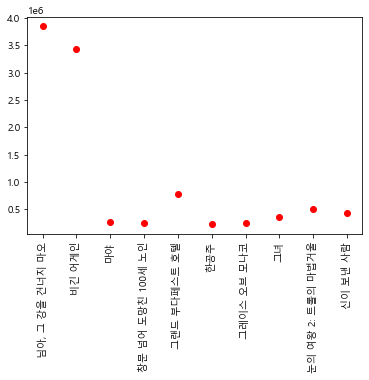

2015


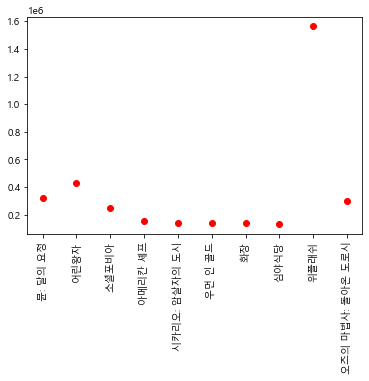

2016


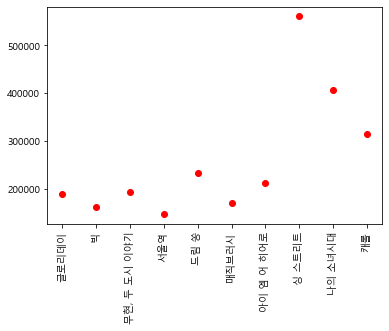

2017


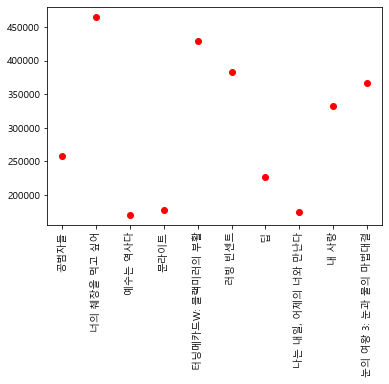

2018


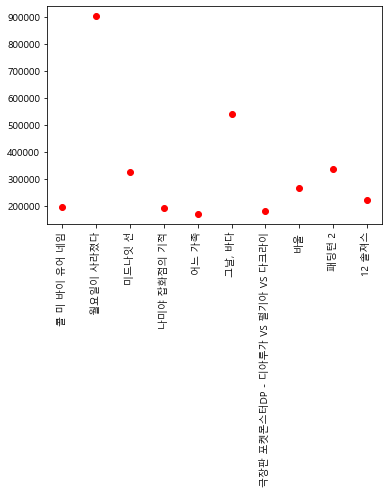

2019


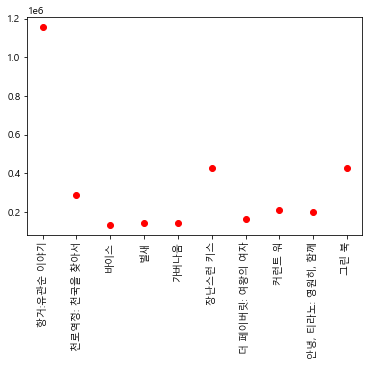

2020


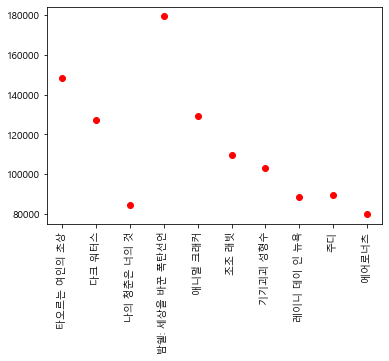

In [64]:
# 연도별로 top10 뽑기
indi_movie_t_10 = indi_movie.sort_values(by="전국매출액", ascending=False).groupby('개봉연도').head(10).sort_values(by="개봉연도")

for i in range(2014, 2021) :
    tmp = indi_movie_t_10[(indi_movie_t_10.개봉연도 == i)]
    print(i)
    plt.plot(tmp['영화명'],tmp['전국관객수'], 'ro')
    plt.xticks(tmp['영화명'], fontsize=10, rotation=90)
    plt.show()
    

귀무가설: 2014-2020 독립영화 top10의 분산은 같다

In [45]:
import pingouin as pg

# 영화의 등분산성 보기

pg.homoscedasticity(dv='전국관객수', group='개봉연도', data=indi_movie_t_10)

# 개봉연도 별 전국관객 수의 집단의 분산이 같다?
# 해가 거듭을 해도 한 영화만 도드라지는 현상이 계속 지속되었다. => 유의미하다.

,W,pval,equal_var
levene,2.159776,0.058729,True


같은 년도에서도 왜 이렇게 관객 수가 차이날까🤔<br>

### 불균형의 원인을 찾아보자
1. 배급사가 어디인가?
2. 배급사별 장르보기
3. 스크린 수


In [46]:
# 배급사명을 ,로 구분시키고 df화함
new_movies = indi_movie.assign(배급사=indi_movie.배급사.str.split(","))

# 분리된 배급사를 시리즈로 만들어준 후, 기존 테이블과 병합해줬다. 
new_movies = new_movies.배급사.apply(pd.Series).merge(new_movies, right_index = True, left_index = True)

# 분리된 배급사들을 행으로 변환하기 위해 melt함수 적용해주고, 연도 별 영화 별로 쉽게 구분할 수 있도록 sorting해주었다. 
new_movies = new_movies.melt(id_vars = ["순번", "개봉연도", "영화명", "감독", "배급사", "개봉일", "국적", "전국스크린수", "전국매출액", "전국관객수", "장르", "등급", "영화구분"], var_name="영화N구분", value_name = "배급사명분리")
new_movies = new_movies.sort_values(by = ["순번", "영화N구분"], ascending = True)

# 영화 중 분리된 배급사 값이 Null값인 경우를 제외해 주었다
new_movies = new_movies[new_movies["배급사명분리"].notnull()]

# 배급사명을 원래 배급사명에 넣었다. 
new_movies['배급사'] = new_movies["배급사명분리"]

# 불필요한 컬럼을 제거했다.
new_movies.drop(['배급사명분리', '영화N구분'], axis=1, inplace=True)

In [47]:
# 배급사가 어디인지 확인하기
# 영화수가 가장 많은 배급사는 (주)팝엔터테인먼트

top_dis = new_movies.groupby(['배급사'])['순번'].count().reset_index().sort_values(by='순번', ascending=False)
# top_dis[(top_dis.배급사 == 'CGV아트하우스')]

top_dis.columns = ['배급사', '영화수']
top_dis

,배급사,영화수
100,(주)팝엔터테인먼트,93
70,(주)영화사 진진,62
148,와이드 릴리즈(주),61
16,(주)디스테이션,59
65,(주)엣나인필름,56
...,...,...
33,(주)뮤제엔터테인먼트,1
31,(주)모인그룹,1
136,어뮤즈,1
137,얼리버드,1


In [48]:
# 매출액 순으로 배급사를 확인하면 CGV아트하우스가 제일 많음.

top_dis1 = new_movies.groupby(['배급사'])['전국매출액'].sum().reset_index().sort_values(by='전국매출액', ascending=False)
top_dis1

,배급사,전국매출액
109,CGV아트하우스,54214409988
170,판씨네마(주),38296710282
12,(주)대명문화공장,30303687479
81,(주)이수C&E,28999994392
65,(주)엣나인필름,19109692228
...,...,...
97,(주)트리필름,15899800
89,(주)콘텐츠 난다긴다,13450900
19,(주)랠리버튼,13444920
171,팔레드시네마(주),10656500


독립영화 배급사들이 영화를 많이 낸다해서 매출액이 많은 건 아니다. <br>
각 배급사별로 개수랑 매출액과의 상관관계 살펴보기.<br>
<br>
귀무가설을 우리가 주장하고 싶은 내용으로 해도 되는 건지 의문이다.<br>
귀무가설 : 배급사별 개수와 매출액은 관련이 없다

In [50]:
dis_com = pd.merge(top_dis, top_dis1, how="inner", on="배급사")
dis_com.columns = ['배급사', '영화수', '전국매출액']
dis_com.sort_values(by="전국매출액", ascending=False).head(10).reset_index()

,index,배급사,영화수,전국매출액
0,6,CGV아트하우스,48,54214409988
1,9,판씨네마(주),43,38296710282
2,64,(주)대명문화공장,5,30303687479
3,11,(주)이수C&E,35,28999994392
4,4,(주)엣나인필름,56,19109692228
5,5,(주)영화사 빅,50,16465716970
6,15,오드,23,15105659421
7,0,(주)팝엔터테인먼트,93,14956272812
8,17,(주)스마일이엔티,20,14528502430
9,97,(주)쇼박스,2,14198464445


In [51]:
ols('전국매출액 ~ 영화수', dis_com).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  전국매출액   R-squared:                       0.380
Model:                            OLS   Adj. R-squared:                  0.376
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sun, 29 Aug 2021   Prob (F-statistic):           9.02e-20
Time:                        17:25:59   Log-Likelihood:                -4190.1
No. Observations:                 176   AIC:                             8384.
Df Residuals:                     174   BIC:                             8391.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     4.8e+08   4.73e+08      1.014      0.312   -4.54e+08    1.41e+09
영화수         2.942e+08   2.85e+07     10.316      0.000    2.38e+08     3.5e+08
==============================================================================
Omnibus:                      188.581   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4812.324
Skew:                           4.152   Prob(JB):                         0.00
Kurtosis:                      27.234   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 귀무가설 기각
관련이 있어 기각.<br>
오염된 데이터로 하다보니 원하는 데이터가 나오지 않았음. (매출액 여러 번 카운트)<br>
=> 배급사는 제외하고 장르를 보기로 함.

## 장르와 매출액의 상관관계

In [52]:
# 장르와 매출액의 상관관계
# 우리의 주장/귀무가설 : 장르와 매출액은 관련이 없다.
# 드라마가 가장 많은데 돈을 버는 것은 드라마가 아니다.
# 개봉을 많이 한다고 해서 매출액이 많이 나오는 건 아니다.
# 즉, 장르와 매출액은 관련이 없다.

indi_movie_s = indi_movie.groupby('장르')['전국매출액'].sum().reset_index()
indi_movie_s

,장르,전국매출액
0,SF,2203588518
1,가족,1669904670
2,공포(호러),6941248083
3,기타,11027280
4,다큐멘터리,56591435826
5,드라마,154580247775
6,멜로/로맨스,54023401186
7,뮤지컬,327809380
8,미스터리,9547421241
9,범죄,6511009015


In [53]:
indi_movie

,순번,개봉연도,영화명,감독,배급사,개봉일,국적,전국스크린수,전국매출액,전국관객수,장르,등급,영화구분
746,747,2014,"님아, 그 강을 건너지 마오",진모영,"CGV아트하우스,(주)대명문화공장",2014-11-27,한국,206,29845004479,3846206,다큐멘터리,전체관람가,독립/예술영화
748,749,2014,비긴 어게인,존 카니,판씨네마(주),2014-08-13,미국,213,27091263504,3426679,멜로/로맨스,15세이상관람가,독립/예술영화
783,784,2014,그랜드 부다페스트 호텔,웨스 앤더슨,"(주)피터팬픽쳐스,이십세기폭스코리아(주)",2014-03-20,미국,163,6012395982,773649,미스터리,"청소년관람불가,15세이상관람가",독립/예술영화
801,802,2014,눈의 여왕 2: 트롤의 마법거울,알렉세이 트시칠린,씨네그루(주)다우기술,2014-12-24,러시아,479,3623421700,498320,애니메이션,전체관람가,독립/예술영화
810,811,2014,신이 보낸 사람,김진무,"주식회사 마운틴픽쳐스,(주)마인스 엔터테인먼트",2014-02-13,한국,285,3059228600,423026,드라마,15세이상관람가,독립/예술영화
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3369,3370,2020,쉬 네버 다이,오드리 커밍스,주식회사 더쿱,2020-04-02,캐나다,41,5224700,631,스릴러,청소년관람불가,독립/예술영화
3370,3371,2020,기도의 막이 내릴 때,후쿠자와 카츠오,노바엔터테인먼트,2020-05-14,일본,33,4874540,601,드라마,15세이상관람가,독립/예술영화
3371,3372,2020,메피스토,김동후,(주)영화사 그램,2020-09-10,한국,30,4054900,502,드라마,15세이상관람가,독립/예술영화
3372,3373,2020,더 워닝,다니엘 칼파소로,(주)더블앤조이픽쳐스,2020-05-06,스페인,32,2068500,448,스릴러,15세이상관람가,독립/예술영화


In [54]:
# 카이제곱검정
import scipy.stats

indi_movie_tmp = indi_movie.pivot_table(values = ['전국매출액'], index= '개봉연도', columns = '장르', aggfunc = 'sum', fill_value = 0).reset_index()
indi_movie_tmp

# chi2, pvalue, dof, expected = scipy.stats.chi2_contingency()
# pvalue

개봉연도      전국매출액                                                \
장르               SF         가족      공포(호러)        기타        다큐멘터리   
0   2014  953065100  389896000   862725800         0  30975007048   
1   2015  622423408  146483300   697465343         0   1191956765   
2   2016  160639200  543237838  1109362821         0   4045259273   
3   2017          0  255148600   479035865         0   6882031526   
4   2018  172799700   93540122   480639613         0   6681849454   
5   2019  157032330          0  1308062451         0   5234664670   
6   2020  137628780  241598810  2003956190  11027280   1580667090   

                                                                            \
장르          드라마       멜로/로맨스        뮤지컬        미스터리          범죄         사극   
0   21754860586  29488619240  290563600  7730176945  1389858064          0   
1   27018537983    946384712          0   199167700  1647223677          0   
2   23226060152   6496998197          0    61638600   456852100  108695700   
3   28264937218   2483326379          0   379455118   854768900          0   
4   15021756034   5951522172          0    31664400   791145800          0   
5   27633692581   6777098916          0   864093888  1046893744          0   
6   11660403221   1879451570   37245780   281224590   324266730          0   

                                                                            \
장르         스릴러        애니메이션           액션        어드벤처        전쟁         코미디   
0   1353762500  10035270900    314441500  2934359236         0  3718897034   
1   2228704448  13833306866    629124000   182102913         0  4698561237   
2    719189400  16615896194   4488386102    48224500  35228370  1853689988   
3   1485158035  19482543919   1694397740   213149361         0  1632322208   
4   2182785338  12351801655  10433594650   796864900  37714850  3838028267   
5   1930046660   7795020117    777401607           0  17777000  1699933046   
6    429883110   2525298700   1470185300           0  33493630  2842069610   

                
장르         판타지  
0            0  
1   1215660443  
2    386248745  
3    755243800  
4   1851671135  
5    198126780  
6    219078360

#### 카이제곱 검증
'장르와 매출액은 관계가 없다'를 검증해야 한다. <br>
명목형 변수는..카이제곱 검증을 써야한다..회귀분석을 쓰면 안된다!

In [55]:
import scipy.stats

tmp3 = indi_movie.pivot_table(values = ['전국매출액'], index= '개봉연도', columns =  '장르', aggfunc = 'sum', fill_value = 0)
tmp3

chi2, pvalue, dof, expected = scipy.stats.chi2_contingency(tmp3)
pvalue

0.0

In [ ]:
## 불균형의 원인 가설

* 배급사 파워와 스크린 수의 상관관계.
* 트랜드를 잘 따라가는 배급사 찾기.

In [ ]:
# 배급사랑 스크린 수의 상관관계(전체)

all_movie = new_movies.groupby("배급사")['전국스크린수'].sum().reset_index()

# 귀무가설 : 배급사랑 스크린 수가 관계가 없다.

In [56]:
# 우리나라는 시장점유율은 관객수로 체크한다!
# 전체 관객수

import numpy as np
all_customer = new_movies.전국관객수.sum() # 55749464
copy_art = new_movies.copy() 
copy_art['시장점유율'] = (copy_art['전국관객수']/all_customer) * 100

list_tmp = [ 
    (copy_art['시장점유율'] >= 0) & (copy_art['시장점유율'] <= 2),
    (copy_art['시장점유율'] >= 2) & (copy_art['시장점유율'] <= 4),
    (copy_art['시장점유율'] >= 4) & (copy_art['시장점유율'] <= 6),
    (copy_art['시장점유율'] >= 6) & (copy_art['시장점유율'] <= 8),
    (copy_art['시장점유율'] >= 8)
]
check_tmp = [1, 2, 3, 4, 5]
copy_art['배급사파워'] = np.select(list_tmp, check_tmp)
copy_art

# 1. 피어슨 상관계수
import scipy.stats as stats
stats.pearsonr(copy_art.배급사파워, copy_art.전국스크린수)

# 2. 스피어만 상관계수
import pingouin as pg
pg.corr(copy_art.배급사파워, copy_art.전국스크린수, method='spearman')

,n,r,CI95%,p-val,power
spearman,1555,0.071741,"[0.02, 0.12]",0.00465,0.808391


In [ ]:
### 배급사파워와 전국스크린수는 관련이 있다
귀무가설 : 배급사파워와 전국스크린수는 관련이 없다. -> 기각! <br>
배급사 파워의 점수가 높은 데이터는 스크린 수가 많다. <br>
즉, 불균형의 원인 중 하나는 배급사 파워 때문이다.

영화명                                                            \
장르             SF 가족 공포(호러) 기타 다큐멘터리 드라마 멜로/로맨스 뮤지컬 미스터리 범죄 사극 스릴러 애니메이션 액션   
배급사                                                                           
(유)조이앤시네마       1  0      0  0     0   0      1   0    0  0  0   0     0  0   
(재)CBS          0  0      0  0     0   3      0   0    0  0  0   0     0  0   
(주) 루스이소니도스     0  0      0  0     0   1      0   0    0  0  0   0     0  0   
(주)김기덕 필름       0  0      0  0     0   1      0   0    0  0  0   0     0  0   
(주)나이너스엔터테인먼트   0  1      0  0     0   5      2   0    1  0  0   0     1  1   
...            .. ..    ... ..   ...  ..    ...  ..  ... .. ..  ..   ... ..   
팔레드시네마(주)       0  0      0  0     0   0      0   0    0  0  0   0     0  1   
플레이리스트(주)       0  0      0  0     0   1      0   0    0  0  0   0     0  0   
필라멘트픽쳐스         0  0      0  0     1   3      0   0    0  0  0   0     0  0   
하준사             0  0      0  0     1   0      0   0    0  0  0   0     0  0   
호우주의보           0  0      0  0     1   0      0   0    0  0  0   0     0  0   

                               
장르            어드벤처 전쟁 코미디 판타지  
배급사                            
(유)조이앤시네마        0  0   0   0  
(재)CBS           0  0   0   0  
(주) 루스이소니도스      0  0   0   0  
(주)김기덕 필름        0  0   0   0  
(주)나이너스엔터테인먼트    0  0   3   0  
...            ... ..  ..  ..  
팔레드시네마(주)        0  0   0   0  
플레이리스트(주)        0  0   0   0  
필라멘트픽쳐스          0  0   0   0  
하준사              0  0   0   0  
호우주의보            0  0   0   0  

[149 rows x 18 columns]